<img src="https://www.anped.org.br/sites/default/files/images/ufcg-lateral.png" width="780" height="240" align="center"/>

## Centro de Engenharia Elétrica e Informática
## Departamento de Engenharia Elétrica
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Veloso
## Aluno(a): Fabio Victor Galdino Nascimento

# Experimento 06: Redes Neurais Artificiais

In [16]:
import os                                             # Operational System para manipulação de arquivos.
import cv2                                            # OpenCV para manipulação de imagens.
import numpy as np                                    # Numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt                       # Pyplot para plotagem de gráficos e imagens.
from sklearn.model_selection import train_test_split  # Função para particionamento dos dados

from tensorflow.keras.models import Sequential        # Classe de modelos sequenciais para construir as redes neurais.
from tensorflow.keras.layers import Dense, Input      # Camada de neurônios densamente conectados.
from tensorflow.keras.optimizers import SGD           # Otimizador "Descida do Gradiente com Momento".
from tensorflow.keras.datasets import boston_housing  # Dataset utilizado nesse experimento.

## 1. Banco de Dados

* Vamos utilizar um banco de dados do catálogo de datasets do Keras, que é disponibilizado como uma função pronta;

* Cada instância do banco de dados corresponde a um conjunto de 13 valores referentes a características de subúrbios de Boston na década de 1970, a exemplo de taxa de crimes, imposto sobre propriedade, etc;

* Esses valores serão utilizados para calcular o valor mediano das residências no respectivo subúrbio em um problema de regressão, de modo que iremos mapear um vetor de entrada com 13 valores em um vetor de saída com 1 único elemento;

* O banco de dados contém 506 valores divididos em 404 instâncias de treino e 102 de teste;

* Uma descrição mais detalhada dos valores de entrada pode ser vista em http://lib.stat.cmu.edu/datasets/boston, onde os valores são descritos na ordem que aparecem;

### 1.1 Organização do banco de dados

* Comumente os dados utilizados no treinamento de modelos de inteligência artificial reservam a primeira dimensão para controlar a amostra e espalham o tipo de dado utilizado nas demais dimensões do tensor. 


* Nesse caso, os nossos dados são vetores de características unidimensionais (1D), de modo que são organizados em tensores bidimensionais (2D) com formato: **dados.shape = (amostras, características)**
    * O i-ésimo exemplo pode ser acessado a partir de: **exemplo = dados[i]**
    * A j-ésima característica dos exemplos pode ser acessada a partir de: **caracteristica = dados[:, j]**
    * Porções do tensor podem ser acessadas utilizando fatiamento, por exemplo:
        * primeiros_5_exemplos = dados[:5]
        * caracteristicas_9a13 = dados[8:13]
        

* Lembrem-se que a contagem de índices em Python começa em 0 e só é inclusiva no primeiro elemento:
    * **:5** produz os índices **0, 1, 2, 3, 4** 
    * **8:13** produz os índices **8, 9, 10, 11, 12** 
        

* O banco de dados pode ser carregado utilizando:
    * **(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()**
    * train_data é um tensor com as entradas do conjunto de treino;
    * test_data é um tensor com as entradas do conjunto de teste;
    * train_targets é um tensor com os gabaritos do conjunto de treino;
    * test_targets é um tensor com os gabaritos do conjunto de teste;

**a. O código abaixo carrega o banco de dados, acesse alguns exemplos de treinamento e de teste e veja suas dimensões.**

* Use índices entre **[0, 404)** para os dados de treino e entre **[0, 102)** para os de teste.

In [17]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 1us/step


In [18]:
train_data[202]

array([9.2520e-02, 3.0000e+01, 4.9300e+00, 0.0000e+00, 4.2800e-01,
       6.6060e+00, 4.2200e+01, 6.1899e+00, 6.0000e+00, 3.0000e+02,
       1.6600e+01, 3.8378e+02, 7.3700e+00])

In [19]:
test_data[51]

array([1.4103e-01, 0.0000e+00, 1.3920e+01, 0.0000e+00, 4.3700e-01,
       5.7900e+00, 5.8000e+01, 6.3200e+00, 4.0000e+00, 2.8900e+02,
       1.6000e+01, 3.9690e+02, 1.5840e+01])

In [20]:
train_data.shape

(404, 13)

In [21]:
test_data.shape

(102, 13)

**b. Verifique as dimensões e as faixas de valores de cada característica nos vetores de entrada dos conjuntos de treino e de teste. A faixa de valores das características são semelhantes? E os dados de treino e de teste?**

* Encontre os valores mínimo/máximo além da média (np.mean) e da variância (np.var) de cada uma das 13 características.
* Sugestão: leia sobre o parâmetro "axis" na documentação das funções np.min, np.max e np.mean.

In [22]:
#Conjunto Treino
linhas, colunas = train_data.shape

for i in range(colunas):
    print('Coluna: {} | Limites: (min: {:.2f} , max: {:.2f}) | Média: {:.2f} | Variância: {:.2f}'.format(i,np.min(train_data,axis = 0)[i], 
    np.max(train_data,axis = 0)[i], np.mean(train_data, axis = 0)[i], np.var(train_data,axis=0)[i]))

Coluna: 0 | Limites: (min: 0.01 , max: 88.98) | Média: 3.75 | Variância: 85.18
Coluna: 1 | Limites: (min: 0.00 , max: 100.00) | Média: 11.48 | Variância: 563.51
Coluna: 2 | Limites: (min: 0.46 , max: 27.74) | Média: 11.10 | Variância: 46.28
Coluna: 3 | Limites: (min: 0.00 , max: 1.00) | Média: 0.06 | Variância: 0.06
Coluna: 4 | Limites: (min: 0.39 , max: 0.87) | Média: 0.56 | Variância: 0.01
Coluna: 5 | Limites: (min: 3.56 , max: 8.72) | Média: 6.27 | Variância: 0.50
Coluna: 6 | Limites: (min: 2.90 , max: 100.00) | Média: 69.01 | Variância: 778.75
Coluna: 7 | Limites: (min: 1.13 , max: 10.71) | Média: 3.74 | Variância: 4.11
Coluna: 8 | Limites: (min: 1.00 , max: 24.00) | Média: 9.44 | Variância: 75.47
Coluna: 9 | Limites: (min: 188.00 , max: 711.00) | Média: 405.90 | Variância: 27611.97
Coluna: 10 | Limites: (min: 12.60 , max: 22.00) | Média: 18.48 | Variância: 4.83
Coluna: 11 | Limites: (min: 0.32 , max: 396.90) | Média: 354.78 | Variância: 8834.99
Coluna: 12 | Limites: (min: 1.73 , m

In [23]:
#Conjunto Teste

for i in range(colunas):
    print('Coluna: {} | Limites: (min: {:.2f} , max: {:.2f}) | Média: {:.2f} | Variância: {:.2f}'.format(i,np.min(test_data,axis = 0)[i], 
    np.max(test_data,axis = 0)[i], np.mean(test_data, axis = 0)[i], np.var(test_data,axis=0)[i]))

Coluna: 0 | Limites: (min: 0.01 , max: 25.05) | Média: 3.09 | Variância: 28.59
Coluna: 1 | Limites: (min: 0.00 , max: 90.00) | Média: 10.90 | Variância: 460.83
Coluna: 2 | Limites: (min: 1.22 , max: 27.74) | Média: 11.26 | Variância: 49.69
Coluna: 3 | Limites: (min: 0.00 , max: 1.00) | Média: 0.10 | Variância: 0.09
Coluna: 4 | Limites: (min: 0.39 , max: 0.87) | Média: 0.54 | Variância: 0.01
Coluna: 5 | Limites: (min: 4.88 , max: 8.78) | Média: 6.35 | Variância: 0.45
Coluna: 6 | Limites: (min: 6.00 , max: 100.00) | Média: 66.85 | Variância: 834.77
Coluna: 7 | Limites: (min: 1.47 , max: 12.13) | Média: 4.01 | Variância: 5.61
Coluna: 8 | Limites: (min: 1.00 , max: 24.00) | Média: 9.98 | Variância: 76.20
Coluna: 9 | Limites: (min: 187.00 , max: 711.00) | Média: 417.50 | Variância: 31158.88
Coluna: 10 | Limites: (min: 13.00 , max: 21.20) | Média: 18.37 | Variância: 4.07
Coluna: 11 | Limites: (min: 24.65 , max: 396.90) | Média: 364.16 | Variância: 6201.47
Coluna: 12 | Limites: (min: 1.92 , m

**Comentário:**

É possivel observar que alguns parametros são parecidos, porém ainda não são valores bons para possuir uma boa acurácia.

**c. Verifique as dimensões e as faixas de valores dos gabaritos dos conjuntos de treino e de teste. Os valores encontrados são semelhantes?**

In [24]:
train_targets.shape

(404,)

In [25]:
test_targets.shape

(102,)

In [26]:
#Gabaraito do conjunto treino

print('Limites: (min: {:.2f} , max: {:.2f}) | Média: {:.2f} | Variância: {:.2f}'.format(np.min(train_targets,axis = 0), 
np.max(train_targets), np.mean(train_targets), np.var(train_targets)))

Limites: (min: 5.00 , max: 50.00) | Média: 22.40 | Variância: 84.62


In [27]:
#Gabaraito do conjunto teste

print('Limites: (min: {:.2f} , max: {:.2f}) | Média: {:.2f} | Variância: {:.2f}'.format(np.min(test_targets,axis = 0), 
np.max(test_targets), np.mean(test_targets), np.var(test_targets)))

Limites: (min: 5.60 , max: 50.00) | Média: 23.08 | Variância: 83.24


**Comentário:**

Podemos observar que os valores da média e variância são próximos, mas não são iguais. Enquanto os limites são os mesmos. 

### 1.2 Pre-processamento dos dados

* Dados cujas características assumem diferentes faixas de valores muitas vezes são problemáticos para o aprendizado dos modelos e podem reduzir a velocidade de convergência ou até mesmo limitar as capacidades do modelo final.

* Nesse sentido, uma prática comum é a normalização dos dados antes do treinamento, que geralmente é feito por característica em forma da subtração da média e divisão pelo desvio padrão, o que faz com que os dados resultantes tenham média 0 e variância 1.

* Um ponto muito importante é que a normalização deve ser feita partir dos mesmos valores em todos os conjuntos, ou seja, os dados são normalizados segundo informações do conjunto de treino.

* Na prática não temos como calcular a média e variância real, mas se os dados de treino são significativos os seus valores são suficientes.

In [28]:
# Calcula a média do conjunto de treino
mean = train_data.mean(axis=0)

# Calcula o desvio padrão do conjunto de treino
std = train_data.std(axis=0)

# Normaliza os dados de treino
train_data -= mean
train_data /= std

# Normaliza os dados de teste
test_data -= mean
test_data /= std

**d. Repita o item b para os dados normalizados. O que se observa quantos aos valores de média e variância para os dados de treino e teste? Comente a sua interpretação sobre as diferenças observadas.**

In [29]:
#Conjunto Treino
linhas, colunas = train_data.shape

for i in range(colunas):
    print('Coluna: {} | Limites: (min: {:.2f} , max: {:.2f}) | Média: {:.2f} | Variância: {:.2f}'.format(i,np.min(train_data,axis = 0)[i], 
    np.max(train_data,axis = 0)[i], np.mean(train_data, axis = 0)[i], np.var(train_data,axis=0)[i]))

Coluna: 0 | Limites: (min: -0.41 , max: 9.23) | Média: -0.00 | Variância: 1.00
Coluna: 1 | Limites: (min: -0.48 , max: 3.73) | Média: 0.00 | Variância: 1.00
Coluna: 2 | Limites: (min: -1.56 , max: 2.45) | Média: 0.00 | Variância: 1.00
Coluna: 3 | Limites: (min: -0.26 , max: 3.89) | Média: -0.00 | Variância: 1.00
Coluna: 4 | Limites: (min: -1.47 , max: 2.68) | Média: -0.00 | Variância: 1.00
Coluna: 5 | Limites: (min: -3.82 , max: 3.47) | Média: 0.00 | Variância: 1.00
Coluna: 6 | Limites: (min: -2.37 , max: 1.11) | Média: 0.00 | Variância: 1.00
Coluna: 7 | Limites: (min: -1.29 , max: 3.44) | Média: 0.00 | Variância: 1.00
Coluna: 8 | Limites: (min: -0.97 , max: 1.68) | Média: 0.00 | Variância: 1.00
Coluna: 9 | Limites: (min: -1.31 , max: 1.84) | Média: -0.00 | Variância: 1.00
Coluna: 10 | Limites: (min: -2.67 , max: 1.60) | Média: 0.00 | Variância: 1.00
Coluna: 11 | Limites: (min: -3.77 , max: 0.45) | Média: 0.00 | Variância: 1.00
Coluna: 12 | Limites: (min: -1.52 , max: 3.48) | Média: 0.

In [30]:
#Conjunto Teste

for i in range(colunas):
    print('Coluna: {} | Limites: (min: {:.2f} , max: {:.2f}) | Média: {:.2f} | Variância: {:.2f}'.format(i,np.min(test_data,axis = 0)[i], 
    np.max(test_data,axis = 0)[i], np.mean(test_data, axis = 0)[i], np.var(test_data,axis=0)[i]))

Coluna: 0 | Limites: (min: -0.40 , max: 2.31) | Média: -0.07 | Variância: 0.34
Coluna: 1 | Limites: (min: -0.48 , max: 3.31) | Média: -0.02 | Variância: 0.82
Coluna: 2 | Limites: (min: -1.45 , max: 2.45) | Média: 0.02 | Variância: 1.07
Coluna: 3 | Limites: (min: -0.26 , max: 3.89) | Média: 0.15 | Variância: 1.52
Coluna: 4 | Limites: (min: -1.41 , max: 2.68) | Média: -0.11 | Variância: 0.87
Coluna: 5 | Limites: (min: -1.96 , max: 3.54) | Média: 0.12 | Variância: 0.89
Coluna: 6 | Limites: (min: -2.26 , max: 1.11) | Média: -0.08 | Variância: 1.07
Coluna: 7 | Limites: (min: -1.12 , max: 4.14) | Média: 0.13 | Variância: 1.36
Coluna: 8 | Limites: (min: -0.97 , max: 1.68) | Média: 0.06 | Variância: 1.01
Coluna: 9 | Limites: (min: -1.32 , max: 1.84) | Média: 0.07 | Variância: 1.13
Coluna: 10 | Limites: (min: -2.49 , max: 1.24) | Média: -0.05 | Variância: 0.84
Coluna: 11 | Limites: (min: -3.51 , max: 0.45) | Média: 0.10 | Variância: 0.70
Coluna: 12 | Limites: (min: -1.49 , max: 2.66) | Média: -

**Comentário:**

Observamos a mudança nos valores da média e variância. Dessa forma, será bem mais fácil trabalhar com os dados, já que a faixa de valores está mais controlada. 

Agora vamos criar uma partição de validação a partir do conjunto de treino para realizar uma validação cruzada. Vamos utilizar a função **train_test_split**, que separa dados e os seus respectivos gabaritos segundo uma fração especificada.

In [31]:
# Fração escolhida para separar o mesmo número de instâncias do conjunto de testes
data_frac = test_data.shape[0] / train_data.shape[0]

# Criação do conjunto de validação
train_data, val_data, train_targets, val_targets = train_test_split(train_data,             # Dados de treino
                                                                    train_targets,          # Gabaritos de treino
                                                                    test_size = data_frac,  # Proporção de dados p/ validação
                                                                    random_state=42)        # Semente para garantir consistencia nos resultados

print("treino:", train_data.shape, train_targets.shape)
print("validação:", val_data.shape, val_targets.shape)

treino: (302, 13) (302,)
validação: (102, 13) (102,)


### 1.2 Construindo o modelo

Para construir o modelo usaremos a classe **Sequential**, que possibilita a construção de modelos sequenciais de forma bastante simples.
* A construção do modelo é feita a partir do seu instanciamento como objeto da classe seguido de chamadas à função **add()** para adicionar camadas.
* Como estamos construindo apenas Redes Neurais Artificiais por enquanto, vamos utilizar apenas as camadas **Dense** e **Input**.
    * A camada Input cria a entrada da rede com **Input( shape = None )**
        * shape corresponde ao formato do tensor de entrada, no nosso caso será o número de características do nosso banco de dados (13);
    * A camada Dense pode ser chamada com **Dense( n_unidades, activation = 'linear' )**
        * n_unidades corresponde ao número de neurônios da camada;
        * activation corresponde à função de ativação utilizada na camada;
* Algumas funções de ativação disponíveis são:
    * "linear"
    * "relu"
    * "sigmoid"
    * "softmax"
    * "tanh"


* Mais informações sobre a camada dense podem ser vistas em **https://keras.io/api/layers/core_layers/dense/**
* Mais informações sobre as ativações disponíveis podem ser vistas em **https://keras.io/api/layers/activations/**

**e. A função abaixo constroi um modelo de rede neural e utiliza a função summary() para apresentar um resumo das informações da rede neural produzida. Comente o que faz cada linha do código.**

* Modifique parâmetros como o número de unidades de cada camada e/ou o formato do tensor de entrada e/ou o número de saídas. 
* Explique como o número de parâmetros de cada camada é calculado.

In [32]:
def build_model( n_inputs, n_outputs ): 
    rede = Sequential()   # construção do modelo sequencial 
    rede.add( Dense( 64, activation = "relu", input_shape = (n_inputs, ) ) ) #Adicionando neurônios na rede e a ativação relu                                                                           
    rede.add( Dense( 128, activation = "relu") ) #Adicionando neurônios na rede e a ativação relu   
    rede.add( Dense( n_outputs ) )  #Adicionando mais uma camada, com um numero de neuronios igual ao numero de saida
    return rede 

model = build_model( 13, 1 ) #montando o modelo
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________


**f. Nesse caso utilizamos uma saída com ativação linear. Qual seria a desvantagem de utilizar esse tipo de ativação nas demais camadas?**

**Resposta:**

A desvantagem é que o conjunto seria a combinação linear da camada anterior, o que resultaria em uma saída limitada em uma fronteira de decisão linear.   

Após a construção do modelo ele deve ser compilado antes que os parâmetros sejam treinados. Isso é feito utilizando a função **compile**:

* **model.compile( optimizer = opt, loss = fperdas, metrics = [] )** 
    * O optimizer é o algoritmo otimizador utilizado no lugar da descida do gradiente, o Keras oferece diversas opções;
        * Para treinar a partir da descida do gradiente utilizaremos o SGD (descida do gradiente com momento), mas setaremos esse parâmetro para 0.
        * **opt = SGD( learning_rate = taxa_de_aprendizagem, momentum = 0 )**
    * A função de perdas pode ser definida a partir do parâmetro loss, como este é um problema de regressão utilizaremos o erro médio quadrático: 
        * **loss = "mse"**
    * Podemos passar uma lista de métricas a serem computadas durante o treinamento, nesse caso utilizaremos o erro médio absoluto:
        * **metrics = ["mae"]**
        * Note que estamos passando uma lista com uma única métrica, mas outras poderiam ser adicionadas à lista.
         
         

* Algoritmos otimizadores populares são o Adam (**https://keras.io/api/optimizers/adam/**) e o RMSprop(**https://keras.io/api/optimizers/rmsprop/**)
* Mais informações sobre os otimizadores disponíveis podem ser vistas em **https://keras.io/api/optimizers/**
* Mais informações sobre as funções de perdas disponíveis podem ser vistas em **https://keras.io/api/losses/**
* Mais informações sobre as métricas disponíveis podem ser vistas em **https://keras.io/api/metrics/**



In [46]:
model = build_model( 13, 1 )
model.compile( optimizer = SGD(learning_rate=0.001, momentum=0.0), loss = "mse", metrics=["mae"] )
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________


### 1.3 Treinando o modelo

O treinamento é realizado a partir da função **fit**, que recebe dados de treino e de validação além de hiperparâmetros como o número de épocas e o tamanho dos lotes de dados (batchsize).

* **hist = model.fit( x = None, y = None, epochs = 1, batchsize = None, validation_data = None, verbose = "auto")**
    * x corresponde aos dados de treino;
    * y corresponde aos gabaritos de treino;
    * epochs corresponde ao número de épocas de treinamento;
    * batchsize corresponde ao tamanho dos lotes entregues à rede de cada vez;
    * validation_data corresponde a uma tupla ( val_data, val_targets ) com os dados de validação;
    * verbose indica como a função deve reportar os resultados:
        * 0: modo silencioso, nenhum retorno em formato de texto;
        * 1: retorno a cada época e barra de progresso;
        * 2: retorno a cada época sem barra de progresso;
    * hist é um dicionário de retorno com os valores de loss e das métricas computadas para treino e validação;

In [47]:
hist = model.fit( x = train_data, 
                  y = train_targets, 
                  epochs = 200, 
                  batch_size = 1, 
                  validation_data = ( val_data, val_targets ), 
                  verbose = 1)

Epoch 1/200
302/302 [==============================] - 1s 1ms/step - loss: 80.4023 - mae: 6.1556 - val_loss: 23.7940 - val_mae: 3.8771
Epoch 2/200
302/302 [==============================] - 0s 1ms/step - loss: 35.5780 - mae: 4.1940 - val_loss: 23.0995 - val_mae: 3.6545
Epoch 3/200
302/302 [==============================] - 0s 1ms/step - loss: 40.3053 - mae: 4.1773 - val_loss: 16.0915 - val_mae: 3.0507
Epoch 4/200
302/302 [==============================] - 0s 1ms/step - loss: 25.6578 - mae: 3.6979 - val_loss: 97.6943 - val_mae: 7.9079
Epoch 5/200
302/302 [==============================] - 0s 1ms/step - loss: 24.2575 - mae: 3.4159 - val_loss: 45.6040 - val_mae: 5.5978
Epoch 6/200
302/302 [==============================] - 0s 1ms/step - loss: 22.4793 - mae: 3.3395 - val_loss: 37.8513 - val_mae: 3.9920
Epoch 7/200
302/302 [==============================] - 0s 1ms/step - loss: 35.0555 - mae: 3.7972 - val_loss: 23.6250 - val_mae: 3.6452
Epoch 8/200
302/302 [==============================] - 

302/302 [==============================] - 0s 1ms/step - loss: 7.8677 - mae: 1.9287 - val_loss: 12.2331 - val_mae: 2.3769
Epoch 62/200
302/302 [==============================] - 0s 1ms/step - loss: 6.1181 - mae: 1.7891 - val_loss: 9.7507 - val_mae: 2.2605
Epoch 63/200
302/302 [==============================] - 0s 1ms/step - loss: 5.5621 - mae: 1.6991 - val_loss: 14.7633 - val_mae: 2.5497
Epoch 64/200
302/302 [==============================] - 0s 986us/step - loss: 5.3284 - mae: 1.6914 - val_loss: 12.0250 - val_mae: 2.3557
Epoch 65/200
302/302 [==============================] - 0s 996us/step - loss: 5.4232 - mae: 1.5906 - val_loss: 13.0680 - val_mae: 2.3636
Epoch 66/200
302/302 [==============================] - 0s 1ms/step - loss: 4.3458 - mae: 1.5860 - val_loss: 12.6654 - val_mae: 2.4616
Epoch 67/200
302/302 [==============================] - 0s 983us/step - loss: 4.7734 - mae: 1.6362 - val_loss: 9.2965 - val_mae: 2.1695
Epoch 68/200
302/302 [==============================] - 0s 989us

302/302 [==============================] - 0s 1ms/step - loss: 2.5948 - mae: 1.1685 - val_loss: 9.4676 - val_mae: 2.0774
Epoch 122/200
302/302 [==============================] - 1s 2ms/step - loss: 3.1474 - mae: 1.2519 - val_loss: 8.9020 - val_mae: 2.0745
Epoch 123/200
302/302 [==============================] - 0s 2ms/step - loss: 2.5716 - mae: 1.1811 - val_loss: 7.4416 - val_mae: 1.9117
Epoch 124/200
302/302 [==============================] - 1s 2ms/step - loss: 2.7913 - mae: 1.1991 - val_loss: 8.9534 - val_mae: 2.0127
Epoch 125/200
302/302 [==============================] - 1s 2ms/step - loss: 2.7774 - mae: 1.2133 - val_loss: 9.2729 - val_mae: 2.2266
Epoch 126/200
302/302 [==============================] - 1s 2ms/step - loss: 2.3178 - mae: 1.1251 - val_loss: 7.6764 - val_mae: 1.8625
Epoch 127/200
302/302 [==============================] - 1s 2ms/step - loss: 2.1249 - mae: 1.0759 - val_loss: 9.7733 - val_mae: 2.1510
Epoch 128/200
302/302 [==============================] - 0s 1ms/step 

Epoch 182/200
302/302 [==============================] - 0s 1ms/step - loss: 1.4424 - mae: 0.9059 - val_loss: 10.0539 - val_mae: 2.1886
Epoch 183/200
302/302 [==============================] - 0s 1ms/step - loss: 1.4484 - mae: 0.8626 - val_loss: 11.3501 - val_mae: 2.3116
Epoch 184/200
302/302 [==============================] - 0s 1ms/step - loss: 1.4436 - mae: 0.8676 - val_loss: 7.7137 - val_mae: 1.9705
Epoch 185/200
302/302 [==============================] - 0s 1ms/step - loss: 1.6204 - mae: 0.9018 - val_loss: 7.1176 - val_mae: 1.9045
Epoch 186/200
302/302 [==============================] - 0s 1ms/step - loss: 1.3305 - mae: 0.8471 - val_loss: 8.0109 - val_mae: 2.0320
Epoch 187/200
302/302 [==============================] - 0s 989us/step - loss: 1.2752 - mae: 0.8046 - val_loss: 9.2220 - val_mae: 2.1156
Epoch 188/200
302/302 [==============================] - 0s 996us/step - loss: 1.4454 - mae: 0.8568 - val_loss: 9.7870 - val_mae: 2.1735
Epoch 189/200
302/302 [==========================

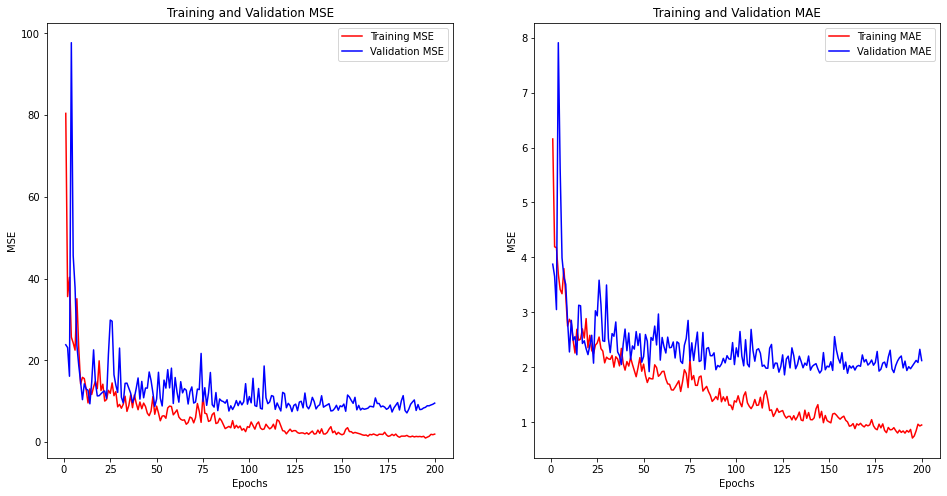

In [48]:
# Plotando os resultados obtidos
fig, axes = plt.subplots(1, 2, squeeze = False, figsize = (16,8))

history_dict = hist.history

# Loss - MSE
train_loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

# Epochs
epochs = range(1, len(train_loss_values) + 1)

# Metrica - MAE
train_mae_values = history_dict["mae"]
val_mae_values = history_dict["val_mae"]

ax = axes.flat[0]
ax.plot(epochs, train_loss_values, "r", label = "Training MSE")
ax.plot(epochs, val_loss_values, "b", label = "Validation MSE")
ax.set_title("Training and Validation MSE")
ax.set_xlabel("Epochs")
ax.set_ylabel("MSE")
ax.legend()

ax = axes.flat[1]
ax.plot(epochs, train_mae_values, "r", label="Training MAE")
ax.plot(epochs, val_mae_values, "b", label="Validation MAE")
ax.set_title("Training and Validation MAE")
ax.set_xlabel("Epochs")
ax.set_ylabel("MSE")
ax.legend()

**g. Comente os resultados obtidos nos gráficos acima. Houve overfitting? Se sim, o que pode ser feito para melhorar a qualidade do modelo?**

**Resposta:**

O que desejamos é que os gráficos sejam os mais parecidos o possível, principalmente nos dados de teste. Nesse caso houve overfitting e poderíamos evitar com a redução do número de variáveis, regularização, entre outros.   

**h. Modifique hiperparâmetros do modelo como o número de camadas, as funções de ativação, o número de épocas realizas e o tamanho dos lotes. Comente os resultados obtidos a partir das mudanças realizadas.**

**Resposta:**

Podemos observar algumas diferenças no gráfico, onde pude observar que a quantidade de épocas interfere muito, já que ela decide quantas vezes será a passagem dos dados de treino pela rede, ou seja, quanto maior a quantidade, melhor o resultado.

### 1.4 Teste do modelo

O teste do modelo pode ser realizado a partir da função **evaluate**, que recebe os dados de treino e retorna o valor de loss calculado para esse conjunto e os valores de cada métrica da lista fornecida durante a compilação do modelo. 

* É uma prática comum realizar ajustes no modelo com base no conjunto de validação e só utilizar o conjunto de testes após a definição dos hiperparâmetros definitivos.
* Como os hiperparâmetros são ajustados a partir dos resultados obtidos para o conjunto de validação, o modelo pode acabar. sobreajustando aos dados de validação, então é interessante mudar os dados desse conjunto com frequência.
* Para mudar os dados de validação basta alterar a semente na função train_test_split.
* Crie um novo modelo do zero após a realização de mudanças nos conjuntos de treino/validação.

In [49]:
test_mse, test_mae = model.evaluate( test_data, test_targets)

# Observa-se que os dados de saída são normalizados em milhares de dólares, 
# então é necessário multiplicar por 1000 para obter os valores absolutos
print("Erro médio absoluto de teste: ${:.2f}".format(1000*test_mae))

4/4 [==============================] - 0s 2ms/step - loss: 24.5148 - mae: 2.8829
Erro médio absoluto de teste: $2882.90


**i. Verifique novamente a faixa de valores dos gabaritos no banco de dados. Considerando a extensão dessa faixa de valores, pode-se dizer que as predições do modelo são significativas?**

In [50]:
#Gabaraito do conjunto treino

print('Limites: (min: {:.2f} , max: {:.2f}) | Média: {:.2f} | Variância: {:.2f}'.format(np.min(train_targets,axis = 0), 
np.max(train_targets), np.mean(train_targets), np.var(train_targets)))

Limites: (min: 5.00 , max: 50.00) | Média: 22.87 | Variância: 90.36


In [51]:
#Gabaraito do conjunto teste

print('Limites: (min: {:.2f} , max: {:.2f}) | Média: {:.2f} | Variância: {:.2f}'.format(np.min(test_targets,axis = 0), 
np.max(test_targets), np.mean(test_targets), np.var(test_targets)))

Limites: (min: 5.60 , max: 50.00) | Média: 23.08 | Variância: 83.24


Sim, as predições foram significativas. Observamos que os parâmetros mudaram. 

## Referências
* Chollet, Francois. Deep learning with Python. Simon and Schuster, 2017.